## 数据处理和标注

In [1]:
import os
import cv2

images = []
lables =[] #0,机器猫， 1，蜡笔小新

jqm_files = os.listdir('./jiqimao/')
lbxx_files = os.listdir('./xiaoxin/')

for file in jqm_files:
    path = os.path.join("./jiqimao",file)
    image = cv2.imread(path)
    image = cv2.resize(image,(299,299))
    images.append(image)
    lables.append(0)
for file in lbxx_files:
    path = os.path.join("./xiaoxin",file)
    image = cv2.imread(path)
    image = cv2.resize(image,(299,299))
    images.append(image)
    lables.append(1)

print("一共有{}个图片，{}个标签".format(len(images),len(lables)))


一共有10个图片，10个标签


1


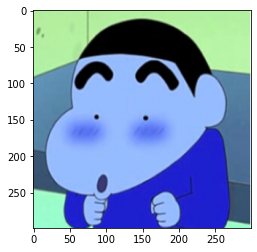

In [3]:
## 随机取一张检查一下
import numpy as np
import matplotlib.pyplot as plt
index = np.random.randint(10)
print(lables[index])
plt.imshow(images[index])

## 迁移学习

In [4]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

In [5]:
from tensorflow.keras.applications.inception_v3 import *
base_model = InceptionV3(weights='imagenet',include_top=False)

In [6]:
## 重新配置inceptionv3的网络的输入和输出
x = base_model.output
x = GlobalAvgPool2D()(x)
x = Dense(1000,activation='relu')(x)
y = Dense(1,activation='sigmoid')(x)
model = Model(inputs=base_model.input,outputs = y)

In [7]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 3 0           batch_normalization[0][0]        
_______________________________________________________________________________________

## 重新训练模型

In [8]:
for layer in base_model.layers:
    layer.trainable = False

In [9]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 3 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [10]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [15]:
model.fit(np.array(images)/255.0,np.array(lables),batch_size=10,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 996us/step - loss: 0.6941 - accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 2.4273 - accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 0.1769 - accuracy: 0.9000
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 1.1416 - accuracy: 0.5000
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 0.6488 - accuracy: 0.5000
Epoch 6/100
1/1 [==============================] - 0s 997us/step - loss: 0.0879 - accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 0.1099 - accuracy: 0.9000
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 0.2471 - accuracy: 0.9000
Epoch 9/100
1/1 [==============================] - 0s 1ms/step - loss: 0.2564 - accuracy: 0.9000
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 0.1431 - accuracy: 0.9000
Epoch 11/100
1/1 [=======

1/1 [==============================] - 0s 5ms/step - loss: 2.0470e-04 - accuracy: 1.0000
Epoch 83/100
1/1 [==============================] - 0s 2ms/step - loss: 2.0330e-04 - accuracy: 1.0000
Epoch 84/100
1/1 [==============================] - 0s 4ms/step - loss: 2.0200e-04 - accuracy: 1.0000
Epoch 85/100
1/1 [==============================] - 0s 2ms/step - loss: 2.0077e-04 - accuracy: 1.0000
Epoch 86/100
1/1 [==============================] - 0s 998us/step - loss: 1.9960e-04 - accuracy: 1.0000
Epoch 87/100
1/1 [==============================] - 0s 2ms/step - loss: 1.9850e-04 - accuracy: 1.0000
Epoch 88/100
1/1 [==============================] - 0s 3ms/step - loss: 1.9744e-04 - accuracy: 1.0000
Epoch 89/100
1/1 [==============================] - 0s 998us/step - loss: 1.9643e-04 - accuracy: 1.0000
Epoch 90/100
1/1 [==============================] - 0s 996us/step - loss: 1.9546e-04 - accuracy: 1.0000
Epoch 91/100
1/1 [==============================] - 0s 3ms/step - loss: 1.9451e-04 - accu

In [16]:
model.save("a.h5")

In [19]:
import cv2
image = cv2.imread('bb.jpg')
x = cv2.resize(image,(299,299))
## 模型预测

(model.predict(np.array([x])/255.0))

array([[0.08156216]], dtype=float32)